In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [2]:
fraud=pd.read_csv("Fraud_check.csv")

In [3]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
fraud.head()

Undergrad Marital.Status  Taxable.Income  City.Population  Work.Experience  \
0        NO         Single           68833            50047               10   
1       YES       Divorced           33700           134075               18   
2        NO        Married           36925           160205               30   
3       YES         Single           50190           193264               15   
4        NO        Married           81002            27533               28   

  Urban  
0   YES  
1   YES  
2   YES  
3   YES  
4    NO

In [5]:
fraud.rename({'Undergrad':'UG','Marital.Status':'MS', 'Taxable.Income':'TI', 'City.Population':'CP', 'Work.Experience':'WE'},axis = 1, inplace = True)

In [6]:
fraud['TI'] = fraud.TI.map(lambda taxable_income : 'Risky' if taxable_income <= 30000 else 'Good')

In [7]:
fraud['UG'] = fraud['UG'].astype("category")
fraud['MS'] = fraud['MS'].astype("category")
fraud['Urban'] = fraud['Urban'].astype("category")
fraud['TI'] = fraud['TI'].astype("category")

In [8]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   UG      600 non-null    category
 1   MS      600 non-null    category
 2   TI      600 non-null    category
 3   CP      600 non-null    int64   
 4   WE      600 non-null    int64   
 5   Urban   600 non-null    category
dtypes: category(4), int64(2)
memory usage: 12.3 KB


In [9]:
label_encoder = preprocessing.LabelEncoder()
fraud['UG'] = label_encoder.fit_transform(fraud['UG'])

fraud['MS'] = label_encoder.fit_transform(fraud['MS'])

fraud['Urban'] = label_encoder.fit_transform(fraud['Urban'])

fraud['TI'] = label_encoder.fit_transform(fraud['TI'])

In [10]:
fraud.head()

UG  MS  TI      CP  WE  Urban
0   0   2   0   50047  10      1
1   1   0   0  134075  18      1
2   0   1   0  160205  30      1
3   1   2   0  193264  15      1
4   0   1   0   27533  28      0

In [11]:
fraud['TI'].value_counts()

0    476
1    124
Name: TI, dtype: int64

In [12]:
x= fraud.iloc[:,[0,1,3,4,5]]
y= fraud.iloc[:,2]

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 10)

In [14]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, class_weight = 'balanced')

In [15]:
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3)

[Text(0.5416666666666666, 0.875, 'X[3] <= 21.5\nentropy = 1.0\nsamples = 420\nvalue = [210.0, 210.0]'),
 Text(0.3333333333333333, 0.625, 'X[3] <= 18.5\nentropy = 0.997\nsamples = 289\nvalue = [141.036, 158.78]'),
 Text(0.16666666666666666, 0.375, 'X[2] <= 26849.0\nentropy = 1.0\nsamples = 252\nvalue = [125.503, 128.049]'),
 Text(0.08333333333333333, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0.0, 2.561]'),
 Text(0.25, 0.125, 'entropy = 1.0\nsamples = 251\nvalue = [125.503, 125.488]'),
 Text(0.5, 0.375, 'X[2] <= 176873.0\nentropy = 0.921\nsamples = 37\nvalue = [15.533, 30.732]'),
 Text(0.4166666666666667, 0.125, 'entropy = 0.866\nsamples = 32\nvalue = [12.426, 30.732]'),
 Text(0.5833333333333334, 0.125, 'entropy = -0.0\nsamples = 5\nvalue = [3.107, 0.0]'),
 Text(0.75, 0.625, 'X[2] <= 44828.0\nentropy = 0.984\nsamples = 131\nvalue = [68.964, 51.22]'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 15\nvalue = [9.32, 0.0]'),
 Text(0.8333333333333334, 0.375, 'X[3] <= 29.5\nen

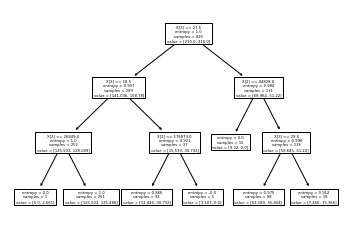

In [16]:
tree.plot_tree(model)

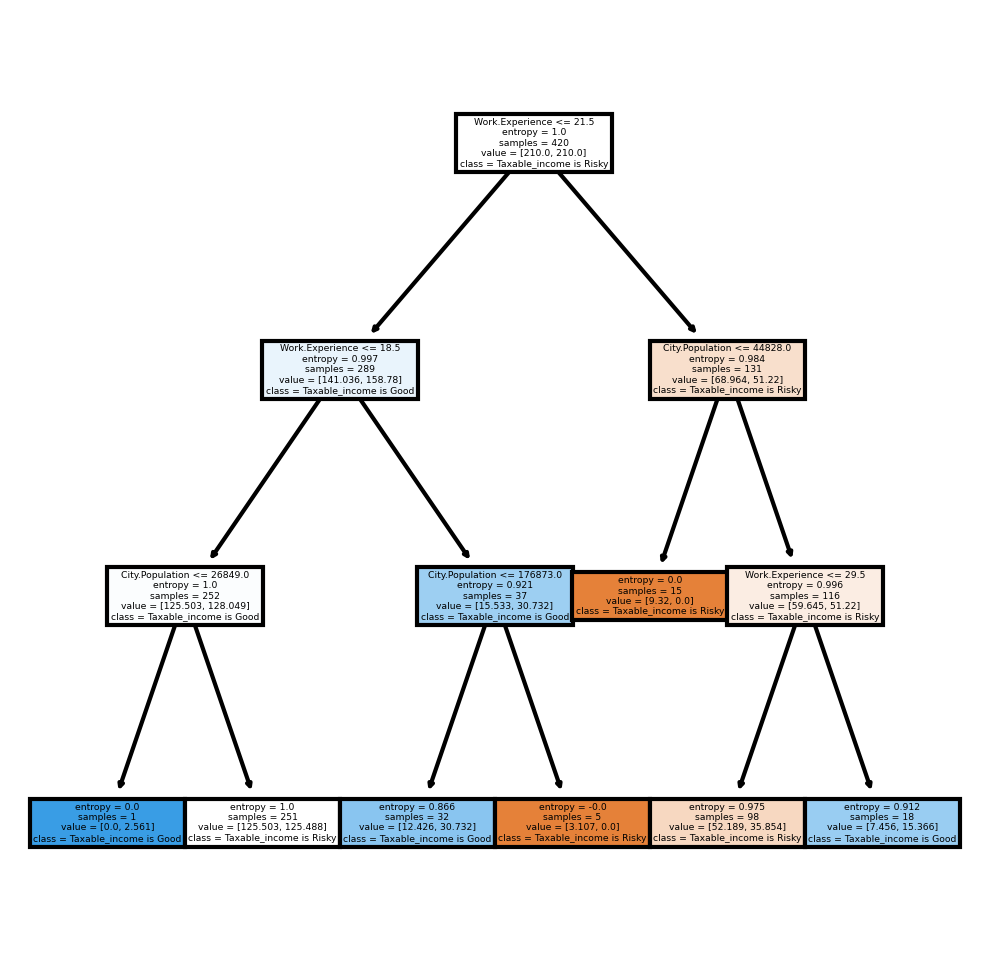

In [17]:
fn = ['Undergrad',	'Marital.Status',	'City.Population',	'Work.Experience',	'Urban']
cn = ['Taxable_income is Risky', 'Taxable_income is Good']
fig,axes = plt.subplots(nrows = 1, ncols =1, figsize =(4,4), dpi = 300)   
tree.plot_tree(model, feature_names = fn, class_names = cn, filled = True);

In [18]:
preds = model.predict(x_test)
preds

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0])

In [19]:
pd.Series(preds).value_counts()

0    157
1     23
dtype: int64

In [20]:
crosstable = pd.crosstab(preds,y_test)
crosstable

TI       0   1
row_0         
0      121  36
1       17   6

In [21]:
np.mean(preds==y_test)

0.7055555555555556

In [22]:
model_cart = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, class_weight = 'balanced') #build model by CART
model_cart.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3)

[Text(0.5, 0.875, 'X[3] <= 21.5\ngini = 0.5\nsamples = 420\nvalue = [210.0, 210.0]'),
 Text(0.25, 0.625, 'X[3] <= 18.5\ngini = 0.498\nsamples = 289\nvalue = [141.036, 158.78]'),
 Text(0.125, 0.375, 'X[3] <= 11.5\ngini = 0.5\nsamples = 252\nvalue = [125.503, 128.049]'),
 Text(0.0625, 0.125, 'gini = 0.495\nsamples = 149\nvalue = [71.45, 87.073]'),
 Text(0.1875, 0.125, 'gini = 0.491\nsamples = 103\nvalue = [54.053, 40.976]'),
 Text(0.375, 0.375, 'X[2] <= 176873.0\ngini = 0.446\nsamples = 37\nvalue = [15.533, 30.732]'),
 Text(0.3125, 0.125, 'gini = 0.41\nsamples = 32\nvalue = [12.426, 30.732]'),
 Text(0.4375, 0.125, 'gini = -0.0\nsamples = 5\nvalue = [3.107, 0.0]'),
 Text(0.75, 0.625, 'X[2] <= 63275.0\ngini = 0.489\nsamples = 131\nvalue = [68.964, 51.22]'),
 Text(0.625, 0.375, 'X[2] <= 44828.0\ngini = 0.23\nsamples = 28\nvalue = [16.775, 2.561]'),
 Text(0.5625, 0.125, 'gini = -0.0\nsamples = 15\nvalue = [9.32, 0.0]'),
 Text(0.6875, 0.125, 'gini = 0.381\nsamples = 13\nvalue = [7.456, 2.561]

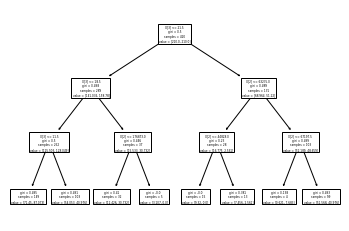

In [23]:
tree.plot_tree(model_cart)

In [24]:
preds1 = model_cart.predict(x_test)
preds1

array([0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0])

In [28]:
from sklearn.metrics import f1_score
print(f1_score(preds1,y_test))
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

0.2706766917293233


In [29]:
dcmodel =  BaggingClassifier(DecisionTreeClassifier(max_depth = 6), random_state=0) 
dcmodel =  AdaBoostClassifier(DecisionTreeClassifier(max_depth = 6), random_state=0)

In [30]:
dcmodel = dcmodel.fit(x_train,y_train) 
y_predict = dcmodel.predict(x_test)

In [31]:
print("Accuracy : ", accuracy_score(y_test,y_predict)*100 )

Accuracy :  66.66666666666666


In [34]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[118  20]
 [ 40   2]]
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       138
           1       0.09      0.05      0.06        42

    accuracy                           0.67       180
   macro avg       0.42      0.45      0.43       180
weighted avg       0.59      0.67      0.63       180

